In [22]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [ ]:
df = pd.read_csv('../../data/handlebar/Accelerometer_data_combined_segmented.csv') 
# df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,2024-07-24 10:26:02.003,2024-07-24 10:26:02.499,8.805878,8.796295,8.757996,8.781937,8.805878,8.796295,8.781937,...,8.757996,8.757996,8.762772,8.757996,8.762772,8.767563,8.738831,8.757996,8.743622,8.772354
1,0.0,2024-07-24 10:26:02.503,2024-07-24 10:26:02.995,8.767563,8.748413,8.753204,8.767563,8.777145,8.781937,8.748413,...,8.777145,8.767563,8.796295,8.810669,8.781937,8.781937,8.757996,8.801086,8.762772,8.757996
2,0.0,2024-07-24 10:26:03.002,2024-07-24 10:26:03.497,8.767563,8.767563,8.772354,8.757996,8.786728,8.777145,8.781937,...,8.777145,8.753204,8.777145,8.767563,8.762772,8.786728,8.734055,8.786728,8.753204,8.786728
3,0.0,2024-07-24 10:26:03.502,2024-07-24 10:26:03.999,8.748413,8.777145,8.767563,8.757996,8.757996,8.757996,8.767563,...,8.762772,8.767563,8.772354,8.801086,8.796295,8.791504,8.781937,8.796295,8.781937,8.781937
4,0.0,2024-07-24 10:26:04.004,2024-07-24 10:26:04.497,8.753204,8.767563,8.748413,8.767563,8.767563,8.772354,8.772354,...,8.786728,8.762772,8.762772,8.767563,8.743622,8.729263,8.743622,8.777145,8.781937,8.791504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,1.0,2024-07-24 11:07:59.132,2024-07-24 11:07:59.497,-9.054871,-9.054871,-17.180786,-21.806396,-20.963638,-3.620026,-12.349289,...,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798
4423,1.0,2024-07-24 11:08:33.627,2024-07-24 11:08:33.995,-22.697037,-22.697037,-24.578873,-24.578873,-23.151932,-11.784256,6.440399,...,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062
4424,1.0,2024-07-24 11:08:51.500,2024-07-24 11:08:51.932,19.646820,18.617310,15.653290,14.911087,28.629868,33.657684,32.556350,...,15.849609,8.700531,10.860092,10.860092,11.185715,11.616669,11.616669,11.616669,11.616669,11.616669
4425,1.0,2024-07-24 11:09:36.075,2024-07-24 11:09:36.497,13.508087,13.508087,13.177689,17.094604,18.507187,18.507187,20.657180,...,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523


In [24]:
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()

curb_scene
0.0    4351
1.0      76
Name: count, dtype: int64

In [25]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)

# Now split the (train_data, train_labels) again into train and validation
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, 
                                                                  test_size=0.25, 
                                                                  random_state=RANDOM_SEED)


In [26]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
val_data_scaled = scaler.transform(val_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])
print(train_data_scaled.shape)
print(val_data_scaled.shape)
print(test_data_scaled.shape)


(2655, 100)
(886, 100)
(886, 100)


In [40]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
val_data_scaled_df = pd.DataFrame(val_data_scaled, columns=val_data.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
train_data_scaled_df['start_time'] = train_data['start_time'].values
train_data_scaled_df['end_time'] = train_data['end_time'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
test_data_scaled_df['start_time'] = test_data['start_time'].values
test_data_scaled_df['end_time'] = test_data['end_time'].values
val_data_scaled_df['curb_scene'] = val_data['curb_scene'].values
val_data_scaled_df['start_time'] = val_data['start_time'].values
val_data_scaled_df['end_time'] = val_data['end_time'].values
train_data_scaled_df.head()

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene,start_time,end_time
0,-0.052058,-0.074465,-0.066130,-0.023631,-0.002116,-0.031856,-0.082615,-0.131695,-0.087268,-0.058483,...,-0.117004,-0.112016,-0.080714,-0.047862,-0.066933,-0.100991,-0.096716,0.0,2024-07-24 11:11:16.505,2024-07-24 11:11:16.997
1,0.722656,1.103390,-0.407042,-0.679414,-0.537780,0.522815,0.738923,0.173374,-0.825989,0.187059,...,0.411249,-1.003176,-0.202502,-0.155266,-0.152697,-0.111156,0.956001,0.0,2024-07-24 11:01:05.000,2024-07-24 11:01:05.496
2,0.733995,1.780699,0.552059,0.380387,-1.038649,-1.365582,-0.517696,0.192194,0.095579,-0.436556,...,1.008766,0.152838,-2.033548,-1.586355,-0.398614,0.839298,0.863143,0.0,2024-07-24 10:49:50.000,2024-07-24 10:49:50.487
3,0.152962,0.224057,-0.630526,-0.271685,0.101457,-0.273292,0.470196,-0.017197,-0.100484,-0.264188,...,1.286850,6.040939,7.908059,10.011526,4.485664,4.376817,4.493915,0.0,2024-07-24 10:42:44.500,2024-07-24 10:42:44.977
4,-2.305533,-2.583491,0.292208,1.296107,0.425930,-0.974261,-1.171173,0.099657,0.884970,-0.130845,...,-1.267585,-1.321003,1.210677,-0.065761,1.915914,-0.902014,-0.081064,0.0,2024-07-24 10:42:56.505,2024-07-24 10:42:56.995


In [41]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
normal_val_data_scaled = val_data_scaled_df[val_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_val_data_scaled = val_data_scaled_df[val_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
val_data_scaled = val_data_scaled_df.values[:, :-3]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]

In [45]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_val_data_scaled = normal_val_data_scaled.astype("float32")
abnormal_val_data_scaled = abnormal_val_data_scaled.astype("float32")
val_data_scaled = val_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")
print(normal_train_data_scaled.dtype)

float32


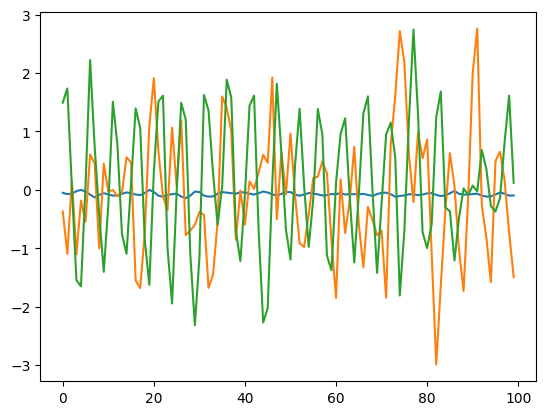

In [29]:
#See normal data ecg
plt.plot(normal_train_data_scaled[0])
plt.plot(normal_train_data_scaled[500])
plt.plot(normal_train_data_scaled[600])

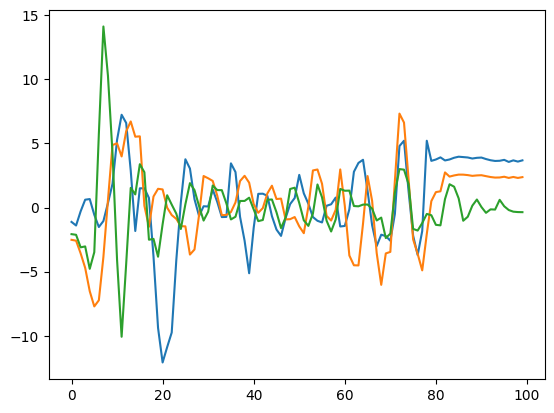

In [30]:
# #see abnormal data
plt.plot(abnormal_train_data_scaled[10])
plt.plot(abnormal_train_data_scaled[20])
plt.plot(abnormal_train_data_scaled[30])


In [50]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(100, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [51]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mae')

In [52]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, normal_train_data_scaled,epochs=100, batch_size=128,
                    validation_data=(val_data_scaled, val_data_scaled), 
                    shuffle=True, callbacks=[early_stopping])

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.7653 - val_loss: 0.7727
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6992 - val_loss: 0.6264
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5664 - val_loss: 0.5970
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5495 - val_loss: 0.5968
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5446 - val_loss: 0.5968
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5528 - val_loss: 0.5968
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5599 - val_loss: 0.5968
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5579 - val_loss: 0.5968
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5416 - val_loss: 0.5967
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5433 - val_loss: 0.5966
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5530 - val_loss: 0.5963
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

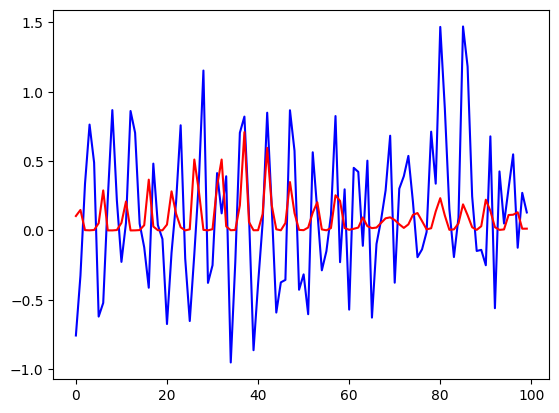

In [53]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled[0], 'blue')
plt.plot(decoder_out[0], 'red')

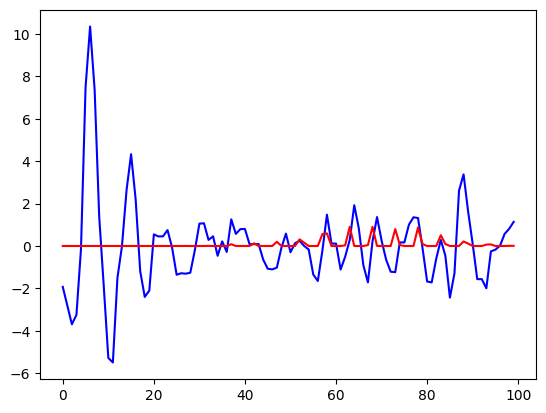

In [54]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(array([ 85., 174.,  13.,   9.,   4.,   1.,   2.,   0.,   3.,   9.,  13.,
         28.,  33.,  27.,  41.,  41.,  37.,  42.,  38.,  31.,  35.,  33.,
         32.,  25.,  21.,  12.,  13.,  13.,  11.,   9.,   5.,  11.,   3.,
          4.,   2.,   5.,   1.,   1.,   1.,   1.,   2.,   0.,   2.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([0.02513736, 0.05980409, 0.09447082, 0.12913755, 0.16380428,
        0.19847101, 0.23313774, 0.26780447, 0.30247122, 0.33713794,
        0.37180468, 0.40647143, 0.44113815, 0.47580487, 0.51047158,
        0.54513836, 0.57980508, 0.61447179, 0.64913851, 0.68380529,
        0.718472  , 0.75313872, 0.7878055 , 0.82247221, 0.85713893,
        0.89180565, 0.92647237, 0.96113914, 0.99580586, 1.03047252,
        1.06513929, 1.09980595, 1.13447273, 1.1691395 , 1.20380616,
        1.23847294, 1.2731396 , 1.30780637, 1.34247315, 1.37713981,
        1.41180658, 1.44647336, 1.48114002, 1.51580679, 1.55047357,
        1.58514023, 1.619807  , 1.65447366, 1.

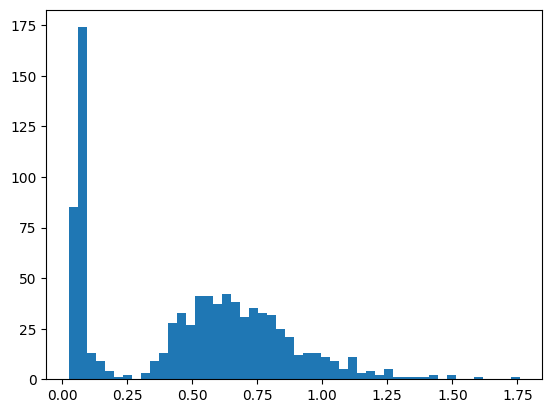

In [55]:
reconstruction = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.34045911, 1.37793255, 1.41540611, 1.45287955, 1.49035299,
        1.52782643, 1.56529999, 1.60277343, 1.64024687, 1.67772031,
        1.71519387, 1.75266731, 1.79014087, 1.82761431, 1.86508775,
        1.90256119, 1.94003463, 1.97750819, 2.01498175, 2.05245519,
        2.08992863, 2.12740207, 2.16487551, 2.20234895, 2.23982239,
        2.27729607, 2.31476951, 2.35224295, 2.38971639, 2.42718983,
        2.46466327, 2.50213671, 2.53961039, 2.57708359, 2.61455727,
        2.65203071, 2.68950415, 2.72697759, 2.76445103, 2.80192471,
        2.83939791, 2.87687159, 2.91434503, 2.95181847, 2.98929191,
        3.02676535, 3.06423903, 3.10171223, 3.13918591, 3.17665935,
        3.21413279]),
 <BarContainer object of 50 artists>)

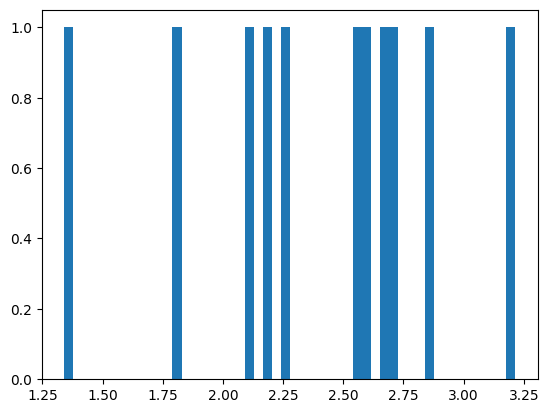

In [56]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

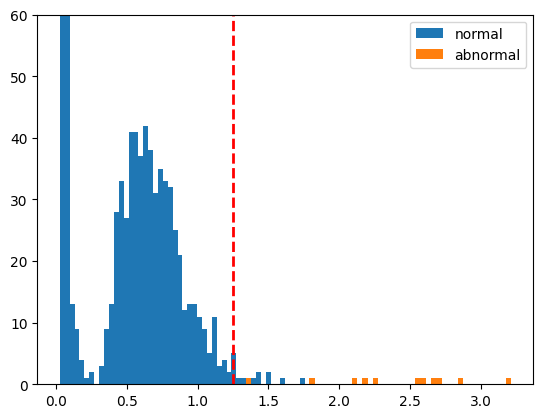

In [58]:
threadshold = 1.25
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threadshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threadshold))
plt.show()

In [59]:
preds=tf.math.less(train_loss, threadshold)
correct = tf.math.count_nonzero(preds)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds))

Correct Predictions:  860
Accuracy:  0.9828571428571429


In [60]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threadshold)
correct = tf.math.count_nonzero(preds_abnormal)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  11
Accuracy:  1.0
